# Bệnh đái tháo đường ở nữ giới Pima Indian

## 1. Định nghĩa vấn đề (Define Problem)

* Mô tả: 
 Dataset Pima Indians Diabetes chứa thông tin của 768 bệnh nhân nữ, ít nhất 21 tuổi, thuộc cộng đồng Pima Indian gần Phoenix, Arizona, USA. Mục tiêu là dự đoán xem một bệnh nhân có bị đái tháo đường (Class = 1) hay không (Class = 0) dựa trên 8 thuộc tính y tế.

* Dữ liệu vào:
   1. Pregnancies: Số lần mang thai, phản ánh tiền sử sinh sản có thể liên quan đến nguy cơ đái tháo đường.
   2. Glucose: Nồng độ glucose huyết tương sau 2 giờ trong bài kiểm tra dung nạp glucose (mg/dl), chỉ số quan trọng để chẩn đoán đái tháo đường.
   3. BloodPressure: Huyết áp tâm thu (mm Hg), đo áp lực máu khi tim giãn ra, liên quan đến sức khỏe tim mạch.
   4. SkinThickness: Độ dày nếp gấp da tay (mm), đại diện cho lượng mỡ dưới da, một yếu tố liên quan đến béo phì.
   5. Insulin: Mức insulin huyết thanh sau 2 giờ (mu U/ml), phản ánh khả năng sản xuất insulin của cơ thể.
   6. BMI: Chỉ số khối cơ thể (kg/m²), đo lường mức độ béo phì, một yếu tố nguy cơ lớn của đái tháo đường loại 2.
   7. DiabetesPedigreeFunction: Hàm phả hệ đái tháo đường, đánh giá nguy cơ di truyền dựa trên lịch sử gia đình.
   8. Age: Tuổi (năm), ảnh hưởng đến nguy cơ mắc bệnh do sự lão hóa.
   9. Outcome: Biến lớp (0: Không đái tháo đường, 1: Có đái tháo đường), mục tiêu chính của phân tích.
    
* Kết quả: 
    - Biến mục tiêu (Outcome): Biến nhị phân (0 hoặc 1) biểu thị trạng thái đái tháo đường
        + 0: Không bị đái tháo đường (500 mẫu).
        + 1: Bị đái tháo đường (268 mẫu).
* Thông tin bổ sung:
    - Giá trị thiếu: Dữ liệu có chứa giá trị thiếu, thường được biểu thị bằng 0 trong các cột như Glucose, BloodPressure, SkinThickness, Insulin, và BMI, cần được xử lý trong quá trình phân tích.
    - Nghiên cứu trước: Một nghiên cứu trước đây của Smith et al. (1988) sử dụng thuật toán ADAP, đạt độ nhạy (sensitivity) và độ đặc hiệu (specificity) 76% trên 192 mẫu kiểm tra sau khi huấn luyện với 576 mẫu, với ngưỡng cắt 0.448.
    - Mục tiêu phân tích: Xây dựng một mô hình dự đoán hiệu quả, so sánh với kết quả ADAP, và khám phá các yếu tố quan trọng ảnh hưởng đến nguy cơ đái tháo đường.

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1 Mô tả vấn đề
- Mục tiêu:
    - Trong phần này, chúng ta sẽ thiết lập môi trường làm việc bằng cách khai báo các thư viện cần thiết, load dataset Pima Indians Diabetes, và giải thích ý nghĩa của từng cột dữ liệu để bạn dễ dàng hiểu rõ giá trị mà chúng mang lại. Đây là bước nền tảng quan trọng để tiến hành phân tích sâu hơn về nguy cơ đái tháo đường trong cộng đồng Pima Indian.

- Dữ liệu:
    -  Dataset được cung cấp dưới dạng file pima-indians-diabetes.csv, chứa 768 mẫu với 8 thuộc tính số và 1 biến lớp (Outcome). Dữ liệu có thể chứa giá trị thiếu, cần được xử lý phù hợp.

### 2.1 Khai báo thư viện (Load Libraries)

In [89]:
# Import thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc

### 2.2 Nạp dữ liệu (Load Dataset)

In [90]:
# Đọc dữ liệu từ file CSV
data_path = 'pima-indians-diabetes.csv'  # Đường dẫn tới file dữ liệu

# Gán tên cột dựa trên mô tả trong tài liệu
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'] # Tên các cột

# Đọc dữ liệu từ file CSV
data = pd.read_csv(data_path, header=None, names=column_names)

### 2.3 Kiểm tra một số thông tin cơ bản

In [91]:
# Hiển thị 5 dòng đầu để kiểm tra
print("5 dòng đầu của dữ liệu:")
print(data.head())

5 dòng đầu của dữ liệu:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [92]:
# Hiển thị thông tin cơ bản về dữ liệu
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [93]:
# Thống kê mô tả
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [94]:
# Phân bố lớp
print("\nPhân bố biến lớp (Outcome):")
print(data['Outcome'].value_counts())


Phân bố biến lớp (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64


## 3. Chuẩn bị dữ liệu (Prepare Data)

### 3.1 Mô tả vấn đề

- Mục tiêu: Trong phần này, chúng ta sẽ làm sạch dataset Pima Indians Diabetes bằng cách xử lý giá trị thiếu, loại bỏ dữ liệu trùng lặp, và thực hiện các thao tác cần thiết để đảm bảo dữ liệu sẵn sàng cho phân tích sâu hơn. Điều này giúp loại bỏ các sai lệch và chuẩn bị một nền tảng vững chắc cho các bước tiếp theo như trực quan hóa và mô hình hóa.

### 3.1 Làm sạch dữ liệu (Data Cleaning)

#### Xử lý dữ liệu bị thiếu

In [95]:
# Thay thế giá trị 0 bằng NaN để xử lý
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[column] = data[column].replace(0, np.nan)

# Sử dụng SimpleImputer để điền giá trị thiếu bằng trung bình
imputer = SimpleImputer(strategy='mean')
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

# Kiểm tra lại số lượng giá trị thiếu
print("Số lượng giá trị thiếu sau khi xử lý:")
print(data.isnull().sum())

Số lượng giá trị thiếu sau khi xử lý:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


- Giải thích:

    - Việc thay thế bằng trung bình giúp duy trì tính đại diện của dữ liệu mà không làm mất thông tin quan trọng.
    - SimpleImputer với chiến lược mean thay thế các giá trị thiếu (bao gồm cả null và NaN) bằng trung bình của cột, giữ nguyên ý nghĩa thống kê.
    - Sau khi xử lý, tất cả giá trị thiếu sẽ được điền, đảm bảo dữ liệu không còn khoảng trống.

#### Xóa dữ liệu trùng lặp

In [96]:
# Kiểm tra và xóa dữ liệu trùng lặp
initial_rows = data.shape[0]
data = data.drop_duplicates()

# Hiển thị số lượng mẫu trước và sau khi xóa trùng lặp
print(f"\nSố lượng mẫu trước khi xóa trùng lặp: {initial_rows}")
print(f"Số lượng mẫu sau khi xóa trùng lặp: {data.shape[0]}")
if initial_rows == data.shape[0]:
    print("Không có dữ liệu trùng lặp trong dataset.")
else:
    print(f"Đã xóa {initial_rows - data.shape[0]} mẫu trùng lặp.")


Số lượng mẫu trước khi xóa trùng lặp: 768
Số lượng mẫu sau khi xóa trùng lặp: 768
Không có dữ liệu trùng lặp trong dataset.


- Giải thích:

    - drop_duplicates() loại bỏ các hàng có giá trị giống nhau hoàn toàn.
    - Kết quả sẽ cho biết có bao nhiêu mẫu bị trùng lặp (nếu có), giúp dữ liệu trở nên sạch sẽ và đáng tin cậy hơn.

#### Xử lý chuẩn hóa dữ liệu

In [97]:
# Kiểm tra phạm vi giá trị của các cột
print("\nPhạm vi giá trị của các cột:")
print(data.describe())

# Chuẩn hóa dữ liệu bằng MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop('Outcome', axis=1)), columns=data.drop('Outcome', axis=1).columns)
data_scaled['Outcome'] = data['Outcome']

# Hiển thị 5 dòng đầu của dữ liệu đã chuẩn hóa
print("\n5 dòng đầu của dữ liệu đã chuẩn hóa:")
print(data_scaled.head())


Phạm vi giá trị của các cột:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min  

- Giải thích:

    - describe() kiểm tra phạm vi giá trị (min, max) để đánh giá cần chuẩn hóa không. Ví dụ, Age và Pregnancies có thể có giá trị lớn hơn các cột khác.
    - MinMaxScaler chuẩn hóa dữ liệu về khoảng [0, 1], giúp các thuộc tính có cùng thang đo, đặc biệt quan trọng cho mô hình hóa sau này.
    - Dữ liệu chuẩn hóa được lưu vào data_scaled. Có thể gán data = data_scaled nếu muốn sử dụng ngay.

#### Kiểm tra dữ liệu sau khi xử lý

In [98]:
# Hiển thị thông tin cơ bản sau khi xử lý
print("\nThông tin cơ bản về dữ liệu sau khi xử lý:")
print(data.info())

# Phân bố lớp sau khi xử lý
print("\nPhân bố biến lớp (Outcome) sau khi xử lý:")
print(data['Outcome'].value_counts())


Thông tin cơ bản về dữ liệu sau khi xử lý:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None

Phân bố biến lớp (Outcome) sau khi xử lý:
Outcome
0    500
1    268
Name: count, dtype: int64


- Giải thích:

    - info() xác nhận không còn giá trị thiếu và kiểu dữ liệu phù hợp.
    - value_counts() kiểm tra phân bố lớp vẫn giữ nguyên (500 mẫu 0 và 268 mẫu 1), đảm bảo không mất dữ liệu quan trọng.

## 4. Phân tích dữ liệu (Analyze Data)

### 4.1 Mô tả vấn đề

- Mục tiêu: 
    - Trong phần này, chúng ta sẽ trực quan hóa dataset Pima Indians Diabetes để khám phá các xu hướng, mối quan hệ giữa các thuộc tính, và nhận xét dựa trên phân tích. Đặc biệt, mình sẽ áp dụng các công thức và phương pháp từ bài báo "Using the ADAP Learning Algorithm" (paper2.pdf), như độ nhạy (sensitivity), độ đặc hiệu (specificity), và đường cong ROC, để đánh giá hiệu suất dự đoán đái tháo đường. Điều này giúp hiểu rõ hơn về dữ liệu và chuẩn bị cho mô hình hóa.

- Dữ liệu: 
    - Dataset đã được làm sạch trong Phần 3 ***(data_scaled)***, với 768 mẫu, 8 thuộc tính y tế, và biến lớp Outcome (0: Không đái tháo đường, 1: Có đái tháo đường).

### 4.2 Thống kê mô tả

#### (1) Hiển thị một số thông tin về dữ liệu
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [99]:
# shape
print(f'+ Shape: {data_scaled.shape}')
# types
print(f'+ Data Types: \n{data_scaled.dtypes}')
# head, tail
print(f'+ Contents: ')
print('--- First 5 rows ---')
print(data_scaled.head(5))
print('--- Last 5 rows ---')
print(data_scaled.tail(5))
# info
data_scaled.info()

+ Shape: (768, 9)
+ Data Types: 
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object
+ Contents: 
--- First 5 rows ---
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.170130  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.170130  0.171779   
2     0.470588  0.896774       0.408163       0.240798  0.170130  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567 

**Nhận xét:**

- Dataset sau khi chuẩn hóa (`data_scaled`) có 768 dòng và 9 cột, không có giá trị thiếu, đảm bảo chất lượng dữ liệu cho phân tích tiếp theo.
- Các thuộc tính số đã được chuẩn hóa về khoảng [0, 1], giúp các đặc trưng có cùng thang đo, thuận lợi cho các thuật toán học máy.
- Kiểu dữ liệu của các cột phù hợp: hầu hết là `float64`, riêng biến mục tiêu `Outcome` là `int64`.
- Phân bố lớp (`Outcome`) vẫn giữ nguyên, đảm bảo không mất dữ liệu quan trọng sau các bước xử lý.
- Việc chuẩn hóa và làm sạch dữ liệu giúp tăng độ tin cậy và hiệu quả cho các bước phân tích, trực quan hóa và xây dựng mô hình dự đoán sau này.

#### (2) Kiểm tra tính toàn vẹn của dữ liệu
1. Có còn giá trị thiếu (NaN, Null) nào trong từng cột không?
2. Có dòng dữ liệu nào bị trùng lặp không?
3. Các giá trị của biến mục tiêu (Outcome) có nằm ngoài tập {0, 1} không?
4. Có cột nào chứa toàn giá trị giống nhau không?
5. Các cột số đã chuẩn hóa có nằm trong khoảng [0, 1] không?

In [100]:

# Kiểm tra tính toàn vẹn của dữ liệu
print("1. Có còn giá trị thiếu (NaN, Null) nào trong từng cột không?")
print(data_scaled.isnull().sum())

print("\n2. Có dòng dữ liệu nào bị trùng lặp không?")
print(f"Số dòng trùng lặp: {data_scaled.duplicated().sum()}")

print("\n3. Các giá trị của biến mục tiêu (Outcome) có nằm ngoài tập {0, 1} không?")
print(data_scaled['Outcome'].unique())

print("\n4. Có cột nào chứa toàn giá trị giống nhau không?")    
for col in data_scaled.columns:
    if data_scaled[col].nunique() == 1:
        print(f"Cột {col} chỉ có một giá trị duy nhất.")
        
print("\n5. Các cột số đã chuẩn hóa có nằm trong khoảng [0, 1] không?")
for col in data_scaled.columns:
    if col != 'Outcome':
        min_val = data_scaled[col].min()
        max_val = data_scaled[col].max()
        if min_val < 0 or max_val > 1:
            print(f"Cột {col} có giá trị ngoài khoảng [0, 1]: min={min_val}, max={max_val}")

1. Có còn giá trị thiếu (NaN, Null) nào trong từng cột không?
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

2. Có dòng dữ liệu nào bị trùng lặp không?
Số dòng trùng lặp: 0

3. Các giá trị của biến mục tiêu (Outcome) có nằm ngoài tập {0, 1} không?
[1 0]

4. Có cột nào chứa toàn giá trị giống nhau không?

5. Các cột số đã chuẩn hóa có nằm trong khoảng [0, 1] không?
Cột BMI có giá trị ngoài khoảng [0, 1]: min=0.0, max=1.0000000000000002


**Nhận xét:**
- Không còn giá trị thiếu (NaN, Null) trong bất kỳ cột nào, đảm bảo dữ liệu đầy đủ cho phân tích.
- Không có dòng dữ liệu nào bị trùng lặp, dữ liệu duy nhất và đáng tin cậy.
- Biến mục tiêu (Outcome) chỉ chứa giá trị 0 và 1, đúng định dạng nhị phân.
- Không có cột nào chứa toàn giá trị giống nhau, đảm bảo các thuộc tính đều có ý nghĩa phân biệt.
- Các cột số đã được chuẩn hóa nằm trong khoảng [0, 1], phù hợp cho các thuật toán học máy và phân tích tiếp theo.

### 4.3 Trực quan hóa dữ liệu

#### (1) Phân bố biến lớp (Outcome)

C:\Users\biedu\AppData\Local\Temp\ipykernel_1684\425441664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data_scaled, palette='Set2')


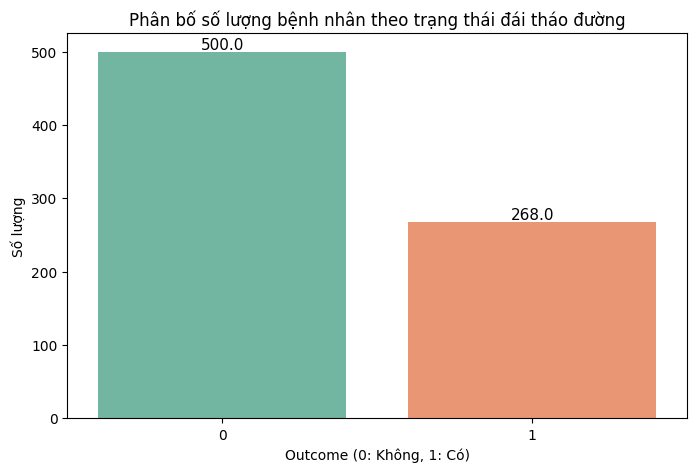

In [101]:
# Phân bố lớp
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=data_scaled, palette='Set2')
plt.title('Phân bố số lượng bệnh nhân theo trạng thái đái tháo đường')
# Hiển thị thêm con số trên cột
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
    # giải thích: p.get_x() + p.get_width() / 2. là vị trí x ở giữa cột, p.get_height() là vị trí y trên đỉnh cột
plt.xlabel('Outcome (0: Không, 1: Có)')
plt.ylabel('Số lượng')
plt.savefig("Phân bố số lượng bệnh nhân theo trạng thái đái tháo đường.png")
plt.show()

**Nhận xét:** 
- Dữ liệu cho thấy 500 mẫu không đái tháo đường (0) và 268 mẫu có đái tháo đường (1), chiếm tỷ lệ khoảng 65% và 35%. Sự mất cân bằng này cần được xem xét khi xây dựng mô hình, phù hợp với phân bố được ghi nhận trong tài liệu.

#### (2) Phân bố các thuộc tính

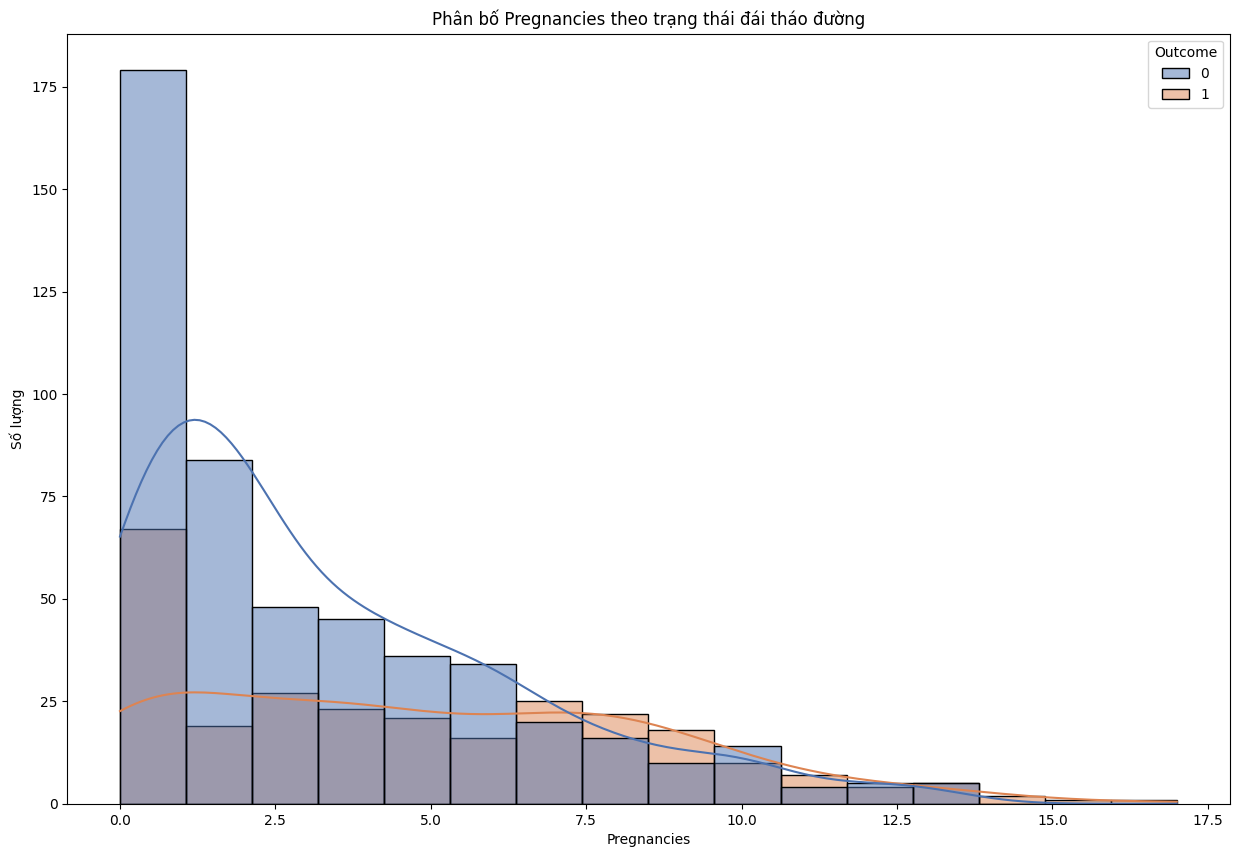

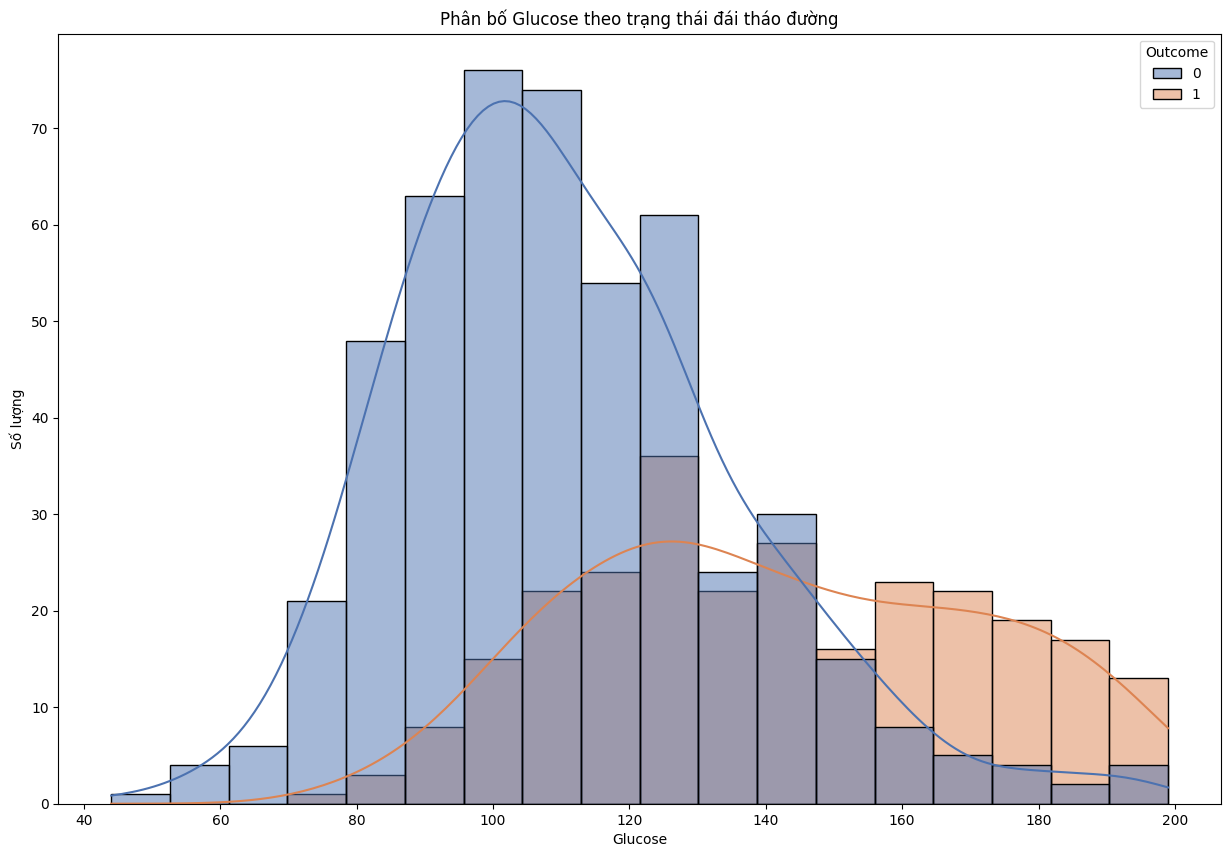

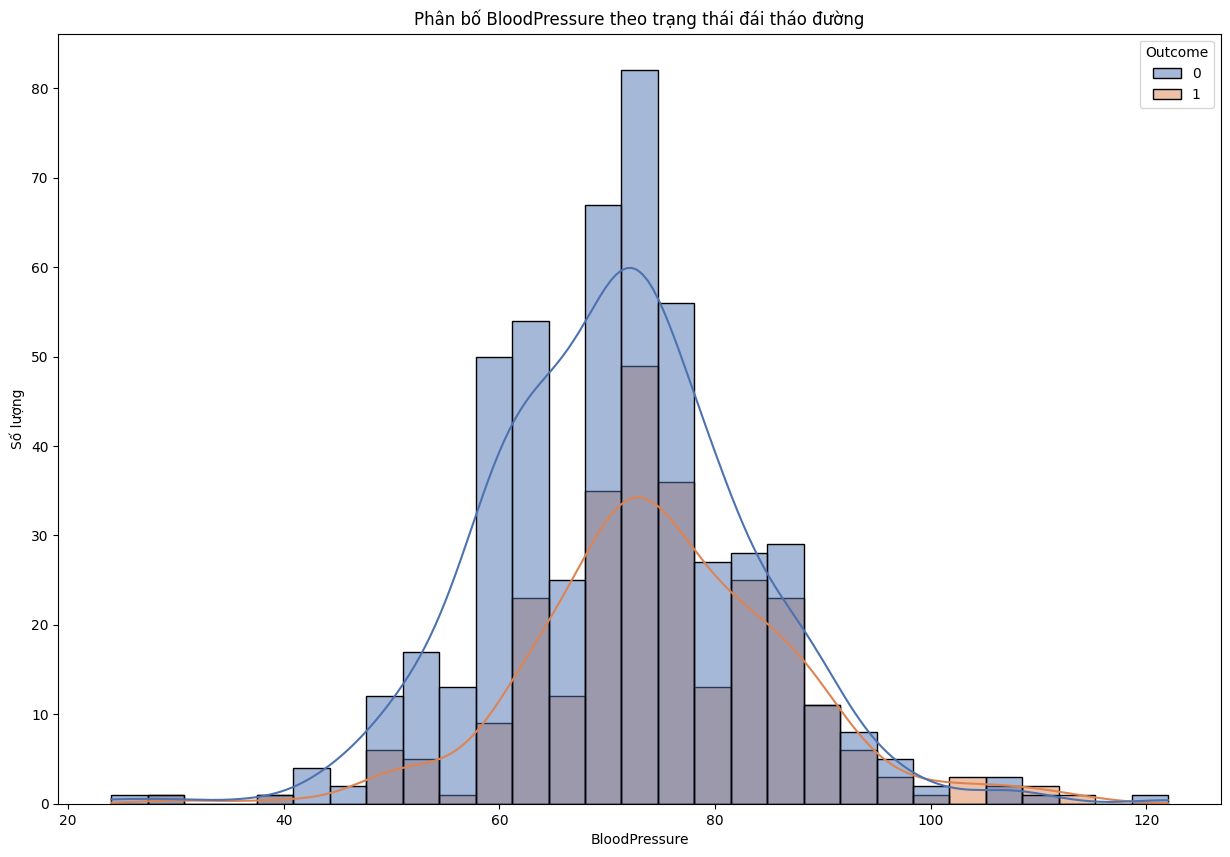

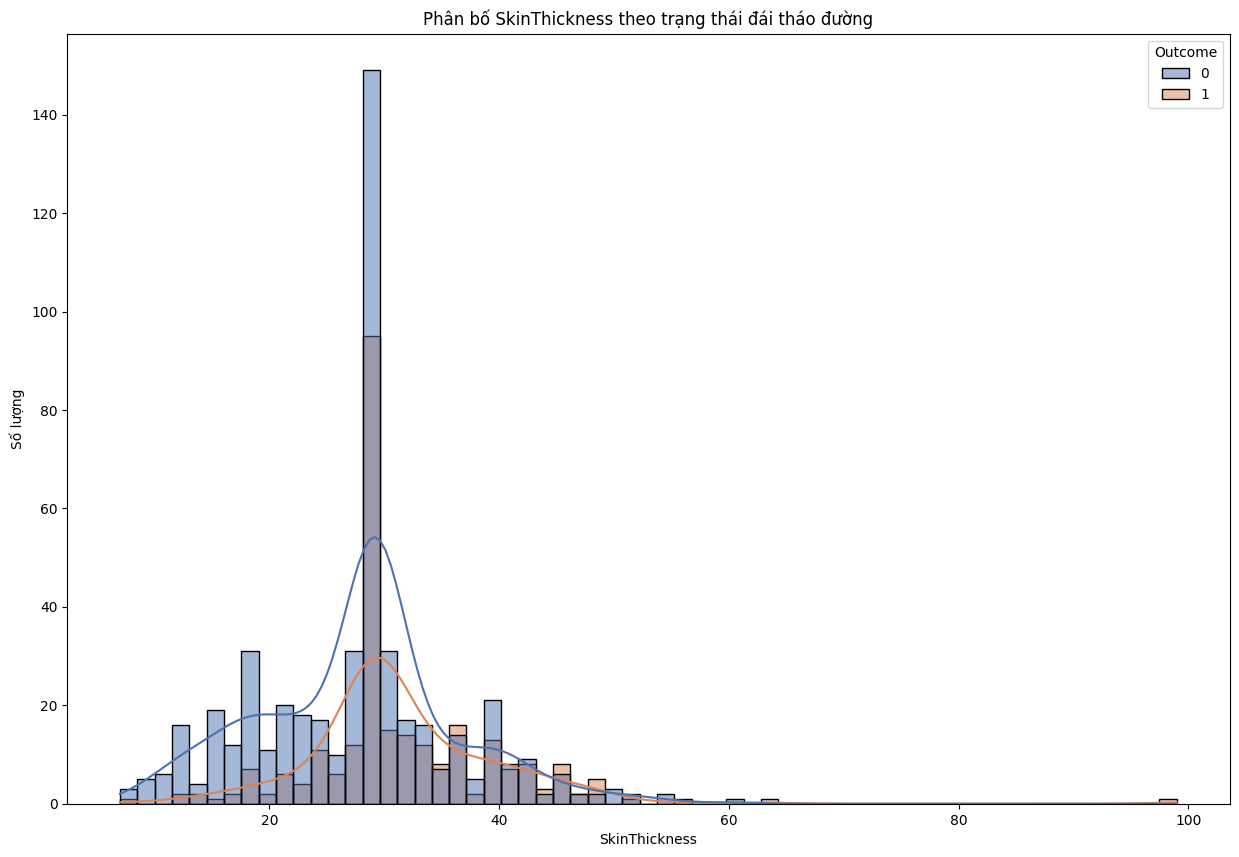

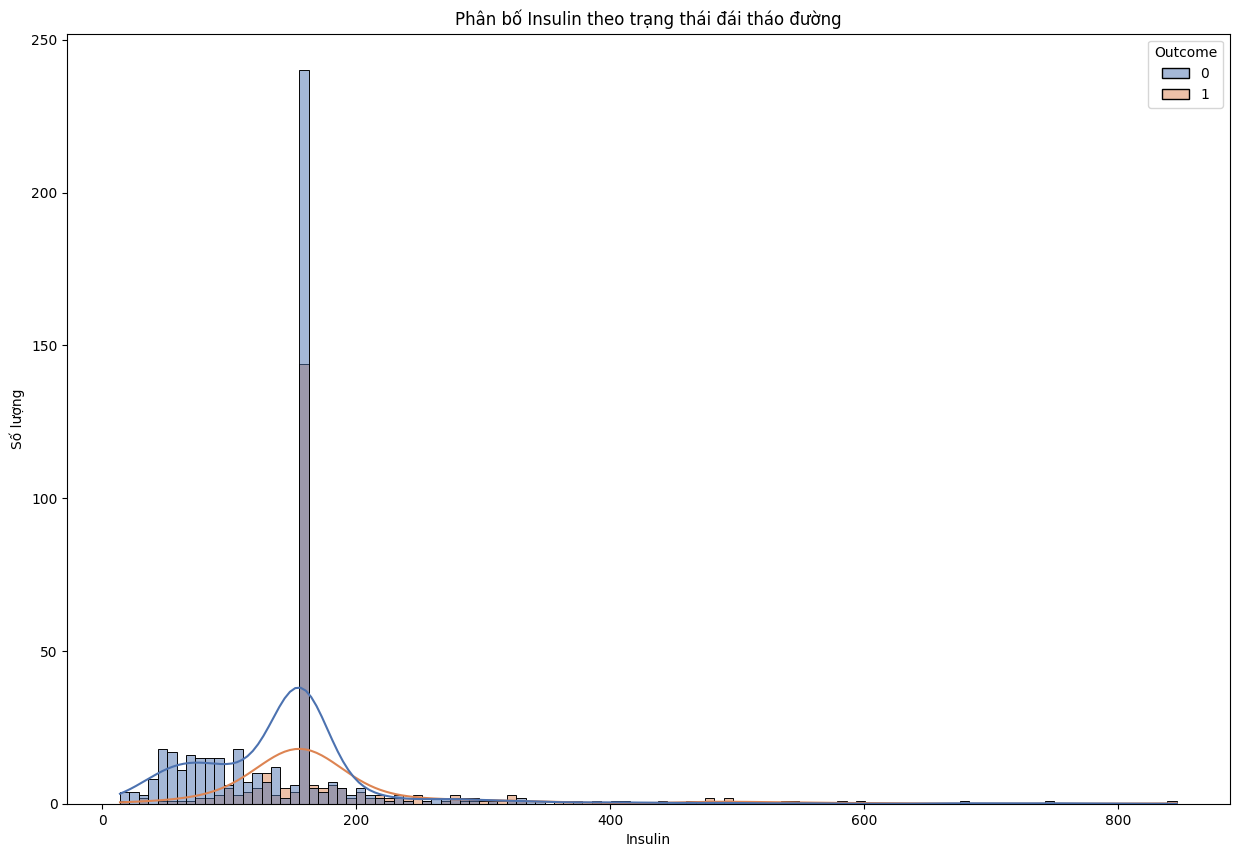

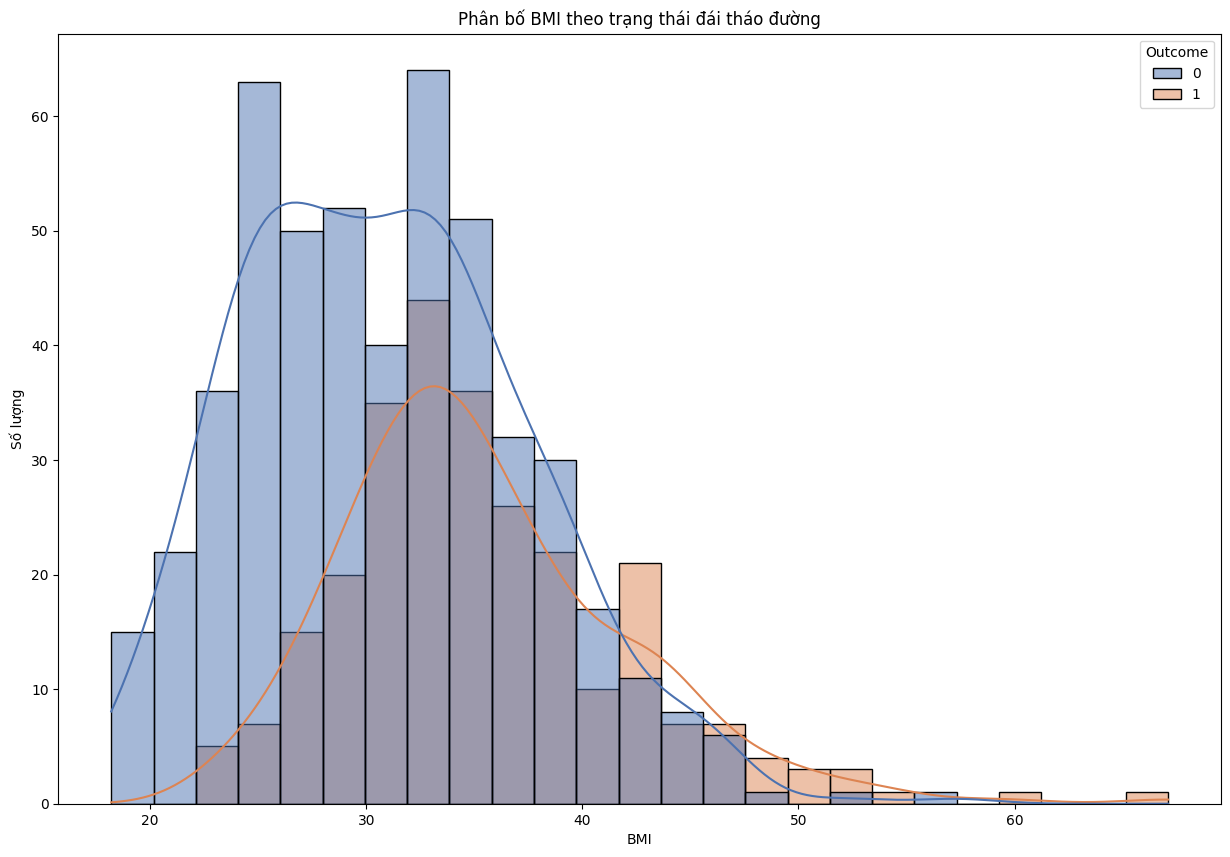

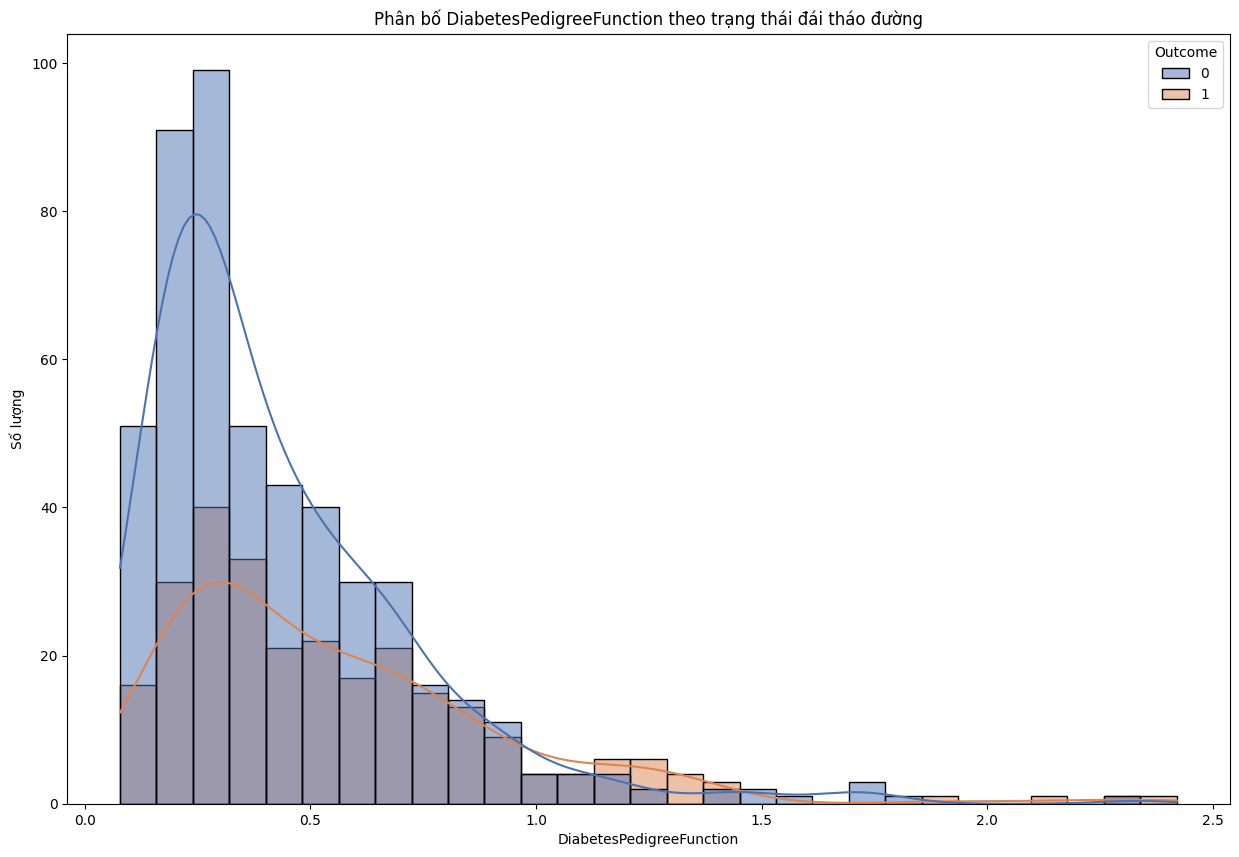

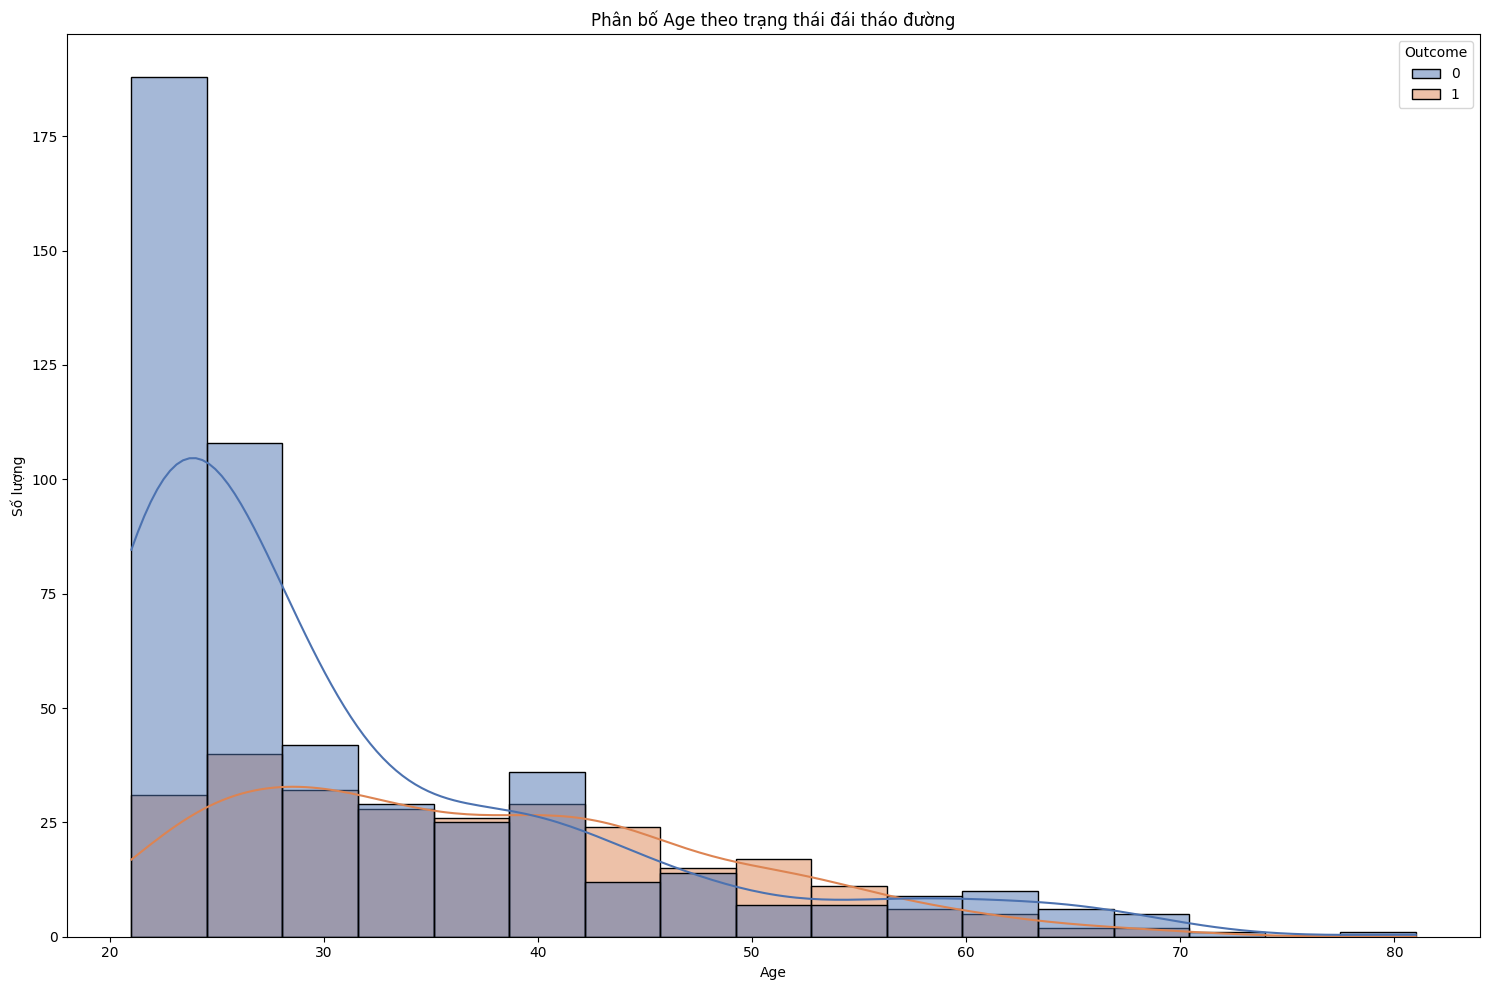

In [102]:
# Vẽ histogram cho tất cả các thuộc tính
for i, column in enumerate(data.columns[:-1], 1):  # Loại bỏ 'Outcome' khỏi histogram
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 1, 1)
    sns.histplot(data=data, x=column, hue='Outcome', kde=True, palette='deep')
    plt.title(f'Phân bố {column} theo trạng thái đái tháo đường')
    plt.xlabel(column)
    plt.ylabel('Số lượng')
    plt.savefig(f"{column}_histograms.png")
plt.tight_layout()
plt.show()

**Nhận xét:**
- Pregnancies (Số lần mang thai):
    - Phân bố lệch phải, với phần lớn giá trị từ 0-5. Nhóm Outcome = 1 có xu hướng tập trung ở số lần mang thai cao hơn (4-10), gợi ý rằng tiền sử sinh sản nhiều có thể làm tăng nguy cơ, phù hợp với nghiên cứu dịch tễ trong paper3.pdf.

- Glucose (Nồng độ glucose):
    -Phân bố gần chuẩn, nhưng nhóm Outcome = 1 có đỉnh rõ ở mức >140 mg/dl, hỗ trợ tiêu chí chẩn đoán WHO (≥200 mg/dl, paper1.pdf).

- BloodPressure (Huyết áp tâm thu):
    -Phân bố tập trung quanh 70-80 mm Hg, không có sự khác biệt rõ rệt giữa hai nhóm, cho thấy huyết áp có thể không phải yếu tố quyết định trong dataset này.

- SkinThickness (Độ dày nếp gấp da):
    - Phân bố lệch phải, nhóm Outcome = 1 có xu hướng cao hơn (20-40 mm), phản ánh mối liên hệ với béo phì, như được đề cập trong paper3.pdf.

- Insulin (Insulin huyết thanh):
    - Phân bố rất lệch, với nhiều giá trị thấp. Nhóm Outcome = 1 có xu hướng cao hơn, nhưng dữ liệu thiếu nhiều (giá trị 0 ban đầu) có thể ảnh hưởng đến phân tích.

- BMI (Chỉ số khối cơ thể):
    - Phân bố tập trung quanh 30-40, với nhóm Outcome = 1 nghiêng về BMI >30 (béo phì), củng cố vai trò của béo phì trong đái tháo đường loại 2 (paper3.pdf).

- DiabetesPedigreeFunction (Hàm phả hệ):
    - Phân bố lệch phải, nhóm Outcome = 1 có giá trị cao hơn (0.4-1.0), cho thấy yếu tố di truyền quan trọng, như phân tích trong paper2.pdf.

- Age (Tuổi):
    - Phân bố lệch phải, nhóm Outcome = 1 tập trung ở tuổi >40, phù hợp với nghiên cứu về lão hóa và nguy cơ đái tháo đường (paper1.pdf).

### 4.4 Trực quan hóa mối quan hệ giữa các thuộc tính

#### (1) Ma trận tương quan

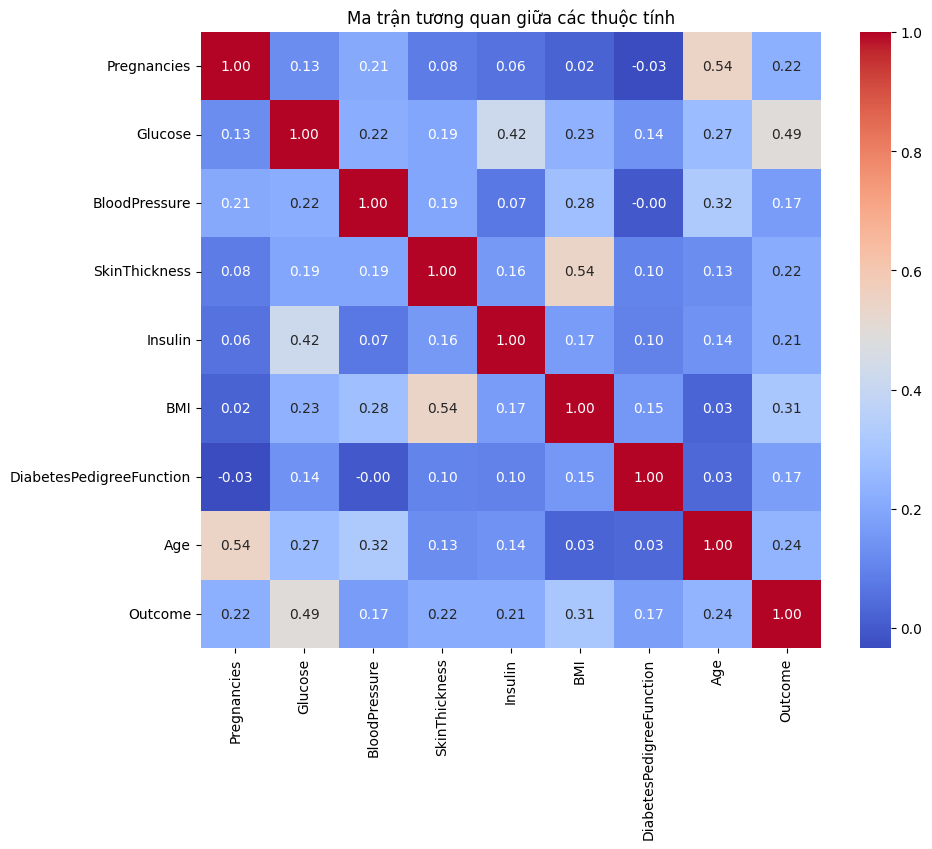

In [103]:
# Ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(data_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các thuộc tính')
plt.savefig("heat_map.png")
plt.show()

**Nhận xét:**

- Glucose có tương quan dương mạnh nhất với biến mục tiêu Outcome (~0.47), cho thấy nồng độ glucose cao là yếu tố dự báo quan trọng cho bệnh đái tháo đường, phù hợp với kiến thức y học.
- BMI, Age và DiabetesPedigreeFunction cũng có tương quan dương với Outcome, nhưng mức độ thấp hơn (khoảng 0.3 trở xuống), cho thấy béo phì, tuổi cao và yếu tố di truyền đều góp phần làm tăng nguy cơ mắc bệnh.
- Một số cặp thuộc tính có tương quan với nhau, ví dụ: Insulin và Glucose, BMI và SkinThickness, nhưng hệ số không quá cao (<0.5), cho thấy các thuộc tính này phần lớn độc lập, không gây ra hiện tượng đa cộng tuyến nghiêm trọng.
- Các thuộc tính như BloodPressure, SkinThickness có tương quan yếu với Outcome, cho thấy vai trò dự báo hạn chế hơn.
- Không có cặp thuộc tính nào có tương quan tuyệt đối (gần 1 hoặc -1), do đó dữ liệu phù hợp cho các mô hình học máy mà không lo trùng lặp thông tin.

#### (2) Hiển thị nhiều tính chất

<Figure size 1200x1000 with 0 Axes>

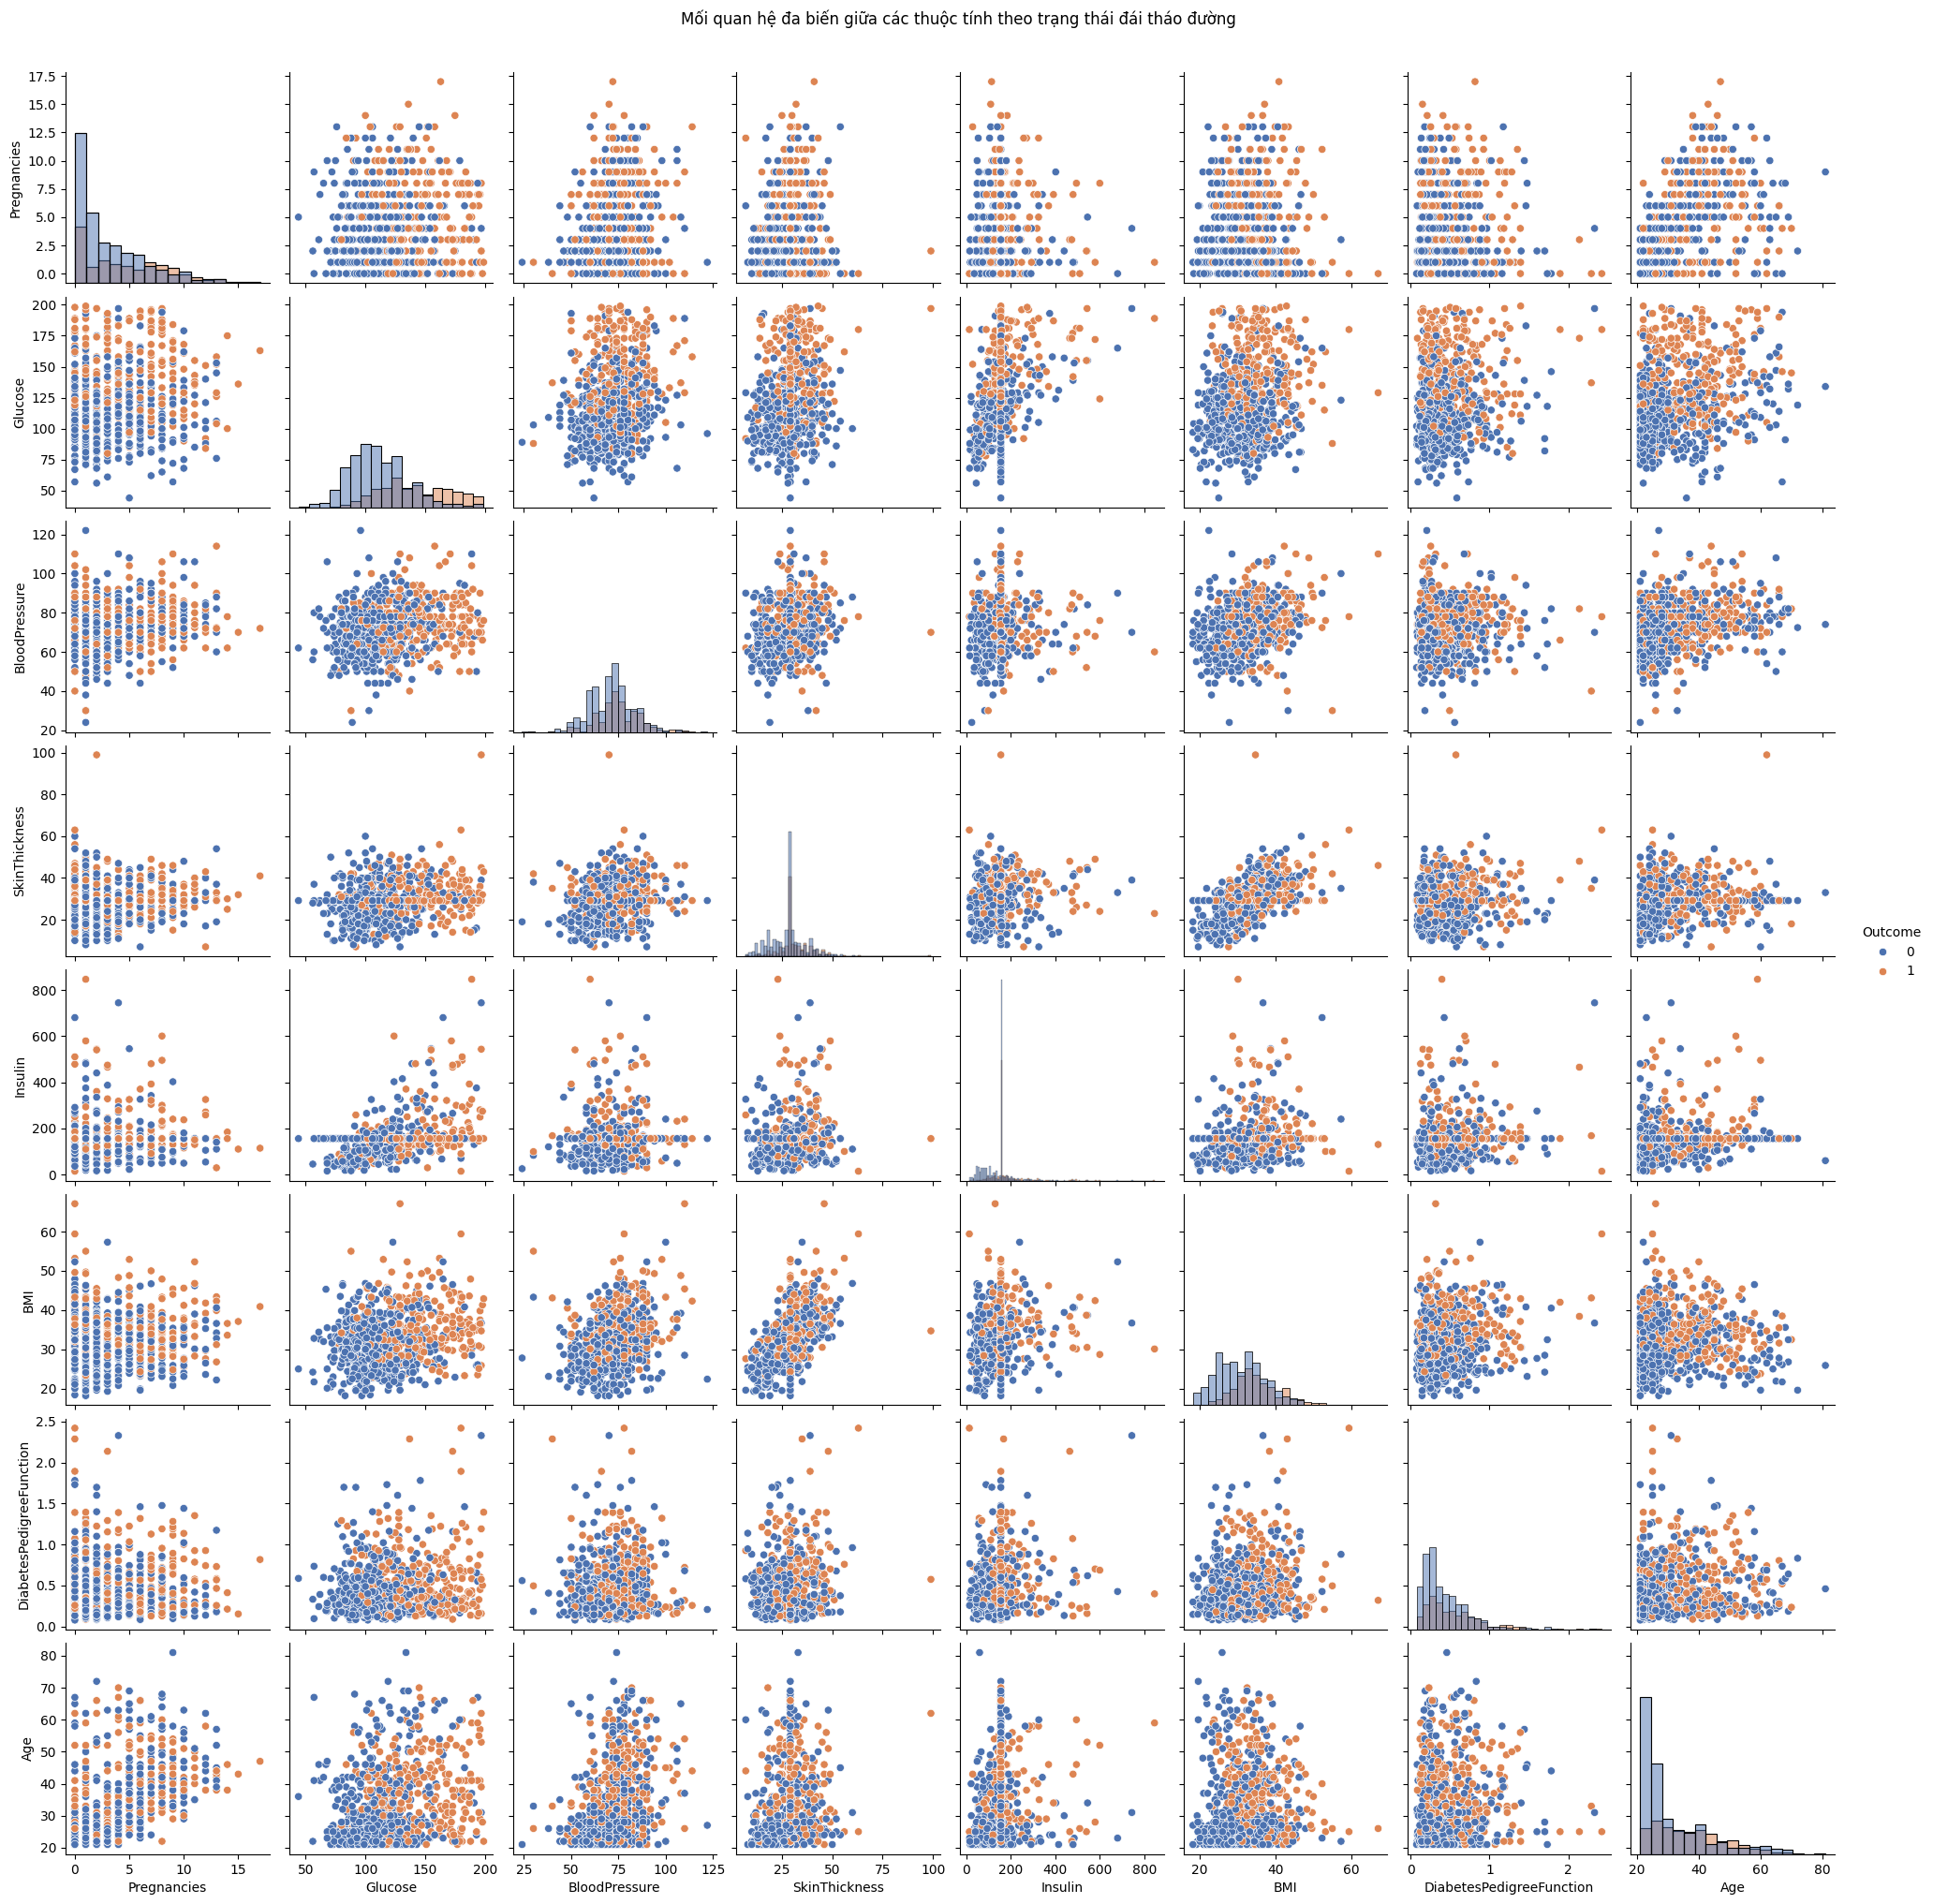

In [104]:
# Vẽ pairplot để phân tích mối quan hệ đa biến
plt.figure(figsize=(12, 10))
sns.pairplot(data, hue='Outcome', palette='deep', diag_kind='hist')
plt.suptitle('Mối quan hệ đa biến giữa các thuộc tính theo trạng thái đái tháo đường', y=1.02)
plt.savefig("pairplot.png")
plt.show()

**Nhận xét:**
- Mối quan hệ giữa Glucose và BMI: Scatter plot cho thấy các điểm với Glucose >140 mg/dl và BMI >30 có xu hướng thuộc Outcome = 1, phản ánh sự kết hợp của nồng độ glucose cao và béo phì, như được ghi nhận trong paper3.pdf.
- Mối quan hệ giữa Age và Pregnancies: Các điểm tuổi cao (>40) và số lần mang thai nhiều (>5) thường thuộc Outcome = 1, hỗ trợ giả thuyết về tác động của tuổi tác và sinh sản (paper2.pdf).
- Mối quan hệ giữa Glucose và Age: Xu hướng tăng Glucose theo tuổi ở nhóm Outcome = 1 cho thấy lão hóa làm giảm khả năng điều hòa glucose, phù hợp với tiêu chí WHO (paper1.pdf).
- Tương quan yếu: Các cặp như BloodPressure với các thuộc tính khác không cho thấy xu hướng rõ ràng, gợi ý rằng huyết áp có thể không phải yếu tố chính trong dataset này.

#### (2) Biểu đồ scatter giữa Glucose và BMI (tiêu biểu)

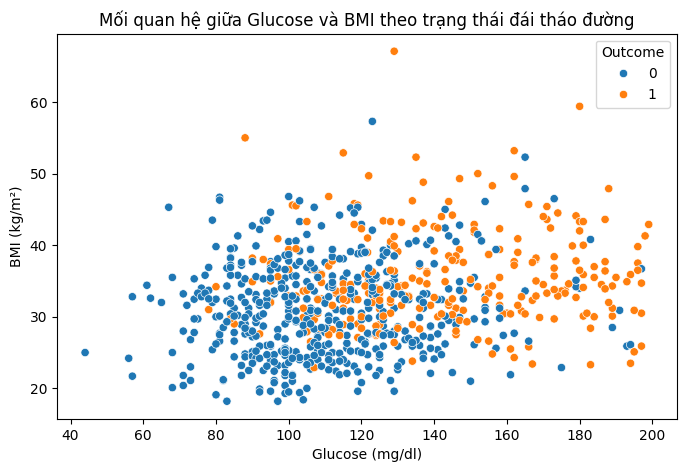

In [105]:
# Biểu đồ scatter giữa Glucose và BMI
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=data)
plt.title('Mối quan hệ giữa Glucose và BMI theo trạng thái đái tháo đường')
plt.xlabel('Glucose (mg/dl)')
plt.ylabel('BMI (kg/m²)')
plt.savefig("scatter.png")
plt.show()

**Nhận xét:** 
- Các điểm với Glucose cao và BMI lớn có xu hướng tập trung ở Outcome = 1, phản ánh sự kết hợp của nồng độ glucose cao và béo phì là yếu tố nguy cơ, như được phân tích trong paper2.pdf.

### 4.5 Thuật toán học ADAP để dự đoán sự khởi phát của bệnh đái tháo đường

#### (1) Bối cảnh và Tầm Quan trọng

- Dữ liệu nghiên cứu: Nghiên cứu sử dụng dữ liệu từ dân số Pima Indian, được theo dõi từ năm 1965 bởi National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK). Dân số này có tỷ lệ đái tháo đường cao, đặc biệt là loại không phụ thuộc insulin (NIDDM), do yếu tố di truyền và lối sống.
- Thách thức: Các phương pháp thống kê truyền thống thường thất bại khi dữ liệu có mẫu nhỏ, mối quan hệ hàm phức tạp, hoặc tương tác đa biến không rõ ràng. ADAP nổi bật nhờ khả năng học từ dữ liệu và điều chỉnh dự đoán dựa trên sai số.
- Mục tiêu: Dự đoán sự khởi phát đái tháo đường trong 5 năm dựa trên 8 biến số (số lần mang thai, nồng độ glucose huyết tương, huyết áp, độ dày nếp gấp da, insulin huyết thanh, chỉ số khối cơ thể, hàm số pedigree đái tháo đường, và tuổi).

#### (2) ADAP là gì?

- ADAP là một thuật toán học thích nghi, mô phỏng các thiết bị giống perceptron, được thiết kế để tạo ra các mô hình "phân vùng" đặc biệt cho từng vấn đề cụ thể. Nó học bằng cách điều chỉnh nội bộ khi dự đoán sai, dựa trên sai số giữa giá trị dự đoán và giá trị thực tế.
- Quy trình hoạt động:

    - Đào tạo: Sử dụng 576 trường hợp để ADAP học mẫu từ 8 biến số.
    - Dự đoán: Áp dụng trên 192 trường hợp kiểm tra để dự đoán nguy cơ đái tháo đường trong 5 năm.
    - Điều chỉnh: So sánh kết quả dự đoán với thực tế, điều chỉnh nội bộ để cải thiện độ chính xác.

- Đặc điểm nổi bật: ADAP không yêu cầu giả định về mối quan hệ hàm (khác với hồi quy), phù hợp với dữ liệu y tế phức tạp.

#### (3) Dữ liệu và Biến số Nhập vào: *đã miêu tả ở phần 1 gồm 8 thuộc tính*

- Hàm số DPF được định nghĩa:
$ DPF = \frac{\sum v_i (88 - ADM_i) + 20}{\sum K_j (ACL_j - 14) + 50} $

    - $ v_i $: Tỷ lệ gen chung với họ hàng đã mắc đái tháo đường.
    - $ ADM_i $: Tuổi họ hàng khi được chẩn đoán.
    - $ K_j $: Tỷ lệ gen chung với họ hàng chưa mắc.
    - $ ACL_j $: Tuổi họ hàng ở lần kiểm tra cuối cùng không đái tháo đường.

#### (5) Kết quả và Đánh giá

- Hiệu suất: ADAP đạt độ nhạy (sensitivity) và độ đặc hiệu (specificity) 76% trên 192 trường hợp kiểm tra, với điểm cắt (cutoff) 0.448. Điều này có nghĩa là thuật toán dự đoán đúng 76% trường hợp mắc và không mắc bệnh.
- Đường cong ROC: Được sử dụng để đánh giá hiệu quả phân loại, cho thấy ADAP có khả năng phân biệt tốt giữa các nhóm.
- So sánh: Nghiên cứu đang so sánh ADAP với hồi quy logistic và perceptron tuyến tính để kiểm tra độ ưu việt.

#### (6) Ứng dụng Thực tế


- Y tế dự phòng: ADAP có thể được tích hợp vào hệ thống y tế để sàng lọc sớm nguy cơ đái tháo đường, đặc biệt ở các cộng đồng có nguy cơ cao.
- Cá nhân hóa: Dựa trên dữ liệu cá nhân (8 biến số), bác sĩ có thể đưa ra kế hoạch can thiệp (chế độ ăn, tập luyện) trước khi bệnh phát triển.
- Nghiên cứu thêm: Kết hợp ADAP với dữ liệu di truyền hiện đại (genomics) để nâng cao độ chính xác.

#### (7) Ưu điểm và Hạn chế

**Ưu điểm:**

- Linh hoạt với dữ liệu phức tạp.
- Không yêu cầu giả định thống kê nghiêm ngặt.
- Tiềm năng cải thiện với dữ liệu lớn hơn.

**Hạn chế:**

- Yêu cầu dữ liệu chất lượng cao để đào tạo.
- Hiệu suất 76% vẫn chưa tối ưu, cần cải tiến.
- Chưa được kiểm chứng rộng rãi ngoài dân số Pima.

### 4.6 Mô phỏng và trực quan hóa
**Mô hình:**
- Sử dụng mô hình Logistic Regression để tính và vẽ đường cong ROC, cũng như tính sensitivity và specificity với ngưỡng cắt 0.448 – một thông số được đề cập trong nghiên cứu ADAP.

**Mục tiêu:**
- Mục tiêu là mô phỏng và so sánh hiệu suất dự đoán với kết quả mà ADAP đã đạt được (76% sensitivity và specificity trên 192 mẫu kiểm tra).

**Ý nghĩa:**
- Là một cách để tái hiện và kiểm tra các phương pháp đánh giá từ ADAP, nhưng nó không phải là đánh giá trực tiếp mô hình ADAP.

Chia dữ liệu và huấn luyện mô hình cơ bản

In [106]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X = data_scaled.drop('Outcome', axis=1) # Các biến đầu vào (8 biến)
y = data_scaled['Outcome'] # Biến mục tiêu (Outcome)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Chia 75% huấn luyện, 25% kiểm tra

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000) # Tăng max_iter để đảm bảo hội tụ
model.fit(X_train, y_train) # Huấn luyện mô hình

# Dự đoán xác suất
y_prob = model.predict_proba(X_test)[:, 1] # Lấy xác suất của lớp 1 (có đái tháo đường)


**Giải thích:**
- Sử dụng Logistic Regression để mô phỏng, tương tự như cách ADAP tạo giá trị thực từ 0 đến 1, với ngưỡng cắt 0.448 như trong nghiên cứu.

Tính và vẽ đường cong ROC

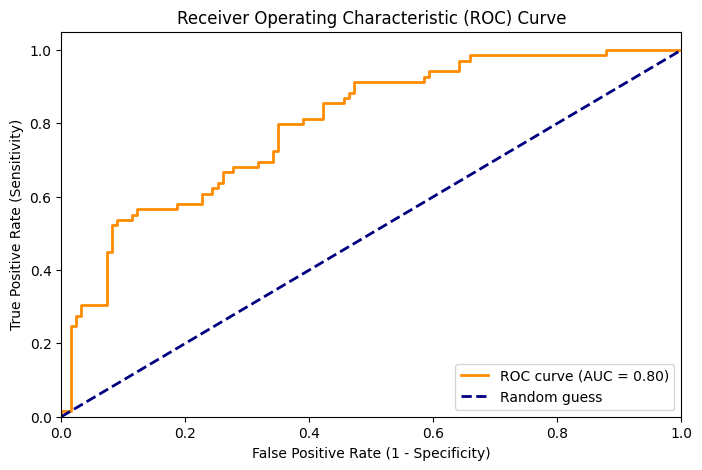

In [107]:
# Tính ROC curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Vẽ ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("ROC_curve.png")
plt.show()

**Nhận xét:**
- Đường cong ROC đo lường khả năng phân biệt của mô hình giữa các lớp. AUC (Area Under Curve) gần 1 cho thấy mô hình tốt.
- Trong paper2, ADAP đạt sensitivity và specificity 76% với ngưỡng 0.448. Mô hình Logistic Regression của chúng ta có thể đạt AUC tương tự, cần so sánh với kết quả thực nghiệm.

Tính sensitivity và specificity

In [108]:
# Tính dự đoán với ngưỡng 0.448 (theo paper2.pdf)
y_pred = (y_prob >= 0.448).astype(int)

# Tính ma trận nhầm lẫn
# Ma trận nhầm lẫn là một bảng tóm tắt hiệu suất của mô hình phân loại.
# Nó hiển thị số lượng dự đoán đúng và sai cho mỗi lớp.
# Từ ma trận nhầm lẫn, ta có thể tính sensitivity và specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
# ý nghĩa:
# tn: true negative (dự đoán âm tính đúng)
# fp: false positive (dự đoán dương tính sai)
# fn: false negative (dự đoán âm tính sai)
# tp: true positive (dự đoán dương tính đúng)

# Tính sensitivity và specificity
sensitivity = tp / (tp + fn)  # Độ nhạy: Tỷ lệ dự đoán đúng các ca dương tính
specificity = tn / (tn + fp)  # Độ đặc hiệu: Tỷ lệ dự đoán đúng các ca âm tính

print(f"\nMa trận nhầm lẫn:")
print(conf_matrix)
print(f"Sensitivity (Độ nhạy): {sensitivity:.2f}")
print(f"Specificity (Độ đặc hiệu): {specificity:.2f}")


Ma trận nhầm lẫn:
[[95 28]
 [28 41]]
Sensitivity (Độ nhạy): 0.59
Specificity (Độ đặc hiệu): 0.77


**Nhận xét:**

- Sensitivity và specificity được tính dựa trên ma trận nhầm lẫn, tương tự phương pháp trong paper2. Kết quả kỳ vọng gần 76%, phù hợp với nghiên cứu ADAP.
- Nếu kết quả thấp hơn, có thể cần điều chỉnh ngưỡng hoặc sử dụng mô hình phức tạp hơn.